#Limpieza de datos

##Lectura de datos y creación del dataset

In [ ]:
import pandas as pd

#Especificar la ruta del archivo CSV
file_path = './data/biom_hema_fin_vp.csv'

# Leer el archivo CSV y crear el dataframe
df = pd.read_csv(file_path, sep=';')

print(df.head())


   ORDEN EDAD  SEXO FECHA_INGRESO HEMATOCRITO HEMOGLOBINA  PLAQUETAS  \
0  93537   28     0    25/02/2022        48,2        14,9      254.0   
1  93538   30     1    25/02/2022        49,8        16,2      259.0   
2  93547   51     1    25/02/2022        46,3        14,7      299.0   
3  93548   46     1    25/02/2022          49        15,8      291.0   
4  93549   49     0    25/02/2022        43,9          14      320.0   

  GLOB_BLANCOS NEUTROFILOS LINFOCITOS  ...   MID   MPV   PDW    PCT RDW_SD  \
0         7,04        5,18       1,49  ...  0,37  10,1  16,2  0,256   49,2   
1         6,62        3,15       2,96  ...  0,51   8,1  15,5  0,209   48,9   
2         5,29        3,38       1,51  ...   0,4   8,9  15,9  0,267   53,4   
3         7,09        3,96       2,57  ...  0,56   8,9  16,5  0,261   47,1   
4         6,24        3,82       1,92  ...   0,5   9,6  16,1  0,307   47,6   

  SEDIMENTACION ANEMIA POLIGLOBULIA NIV_CONF_ANE NIV_CONF_POL  
0           NaN      1            

##Cambio de formato

In [ ]:
# Eliminar la columna 'SEDIMENTACION'
df = df.drop(columns=['SEDIMENTACION'])# Paso 5: Mostrar los tipos de datos de cada columna
print(df.dtypes)

# Mostrar las primeras filas del dataframe para verificar que se haya leído y modificado correctamente
print(df.head())

ORDEN                    int64
EDAD                    object
SEXO                     int64
FECHA_INGRESO           object
HEMATOCRITO             object
HEMOGLOBINA             object
PLAQUETAS              float64
GLOB_BLANCOS            object
NEUTROFILOS             object
LINFOCITOS              object
NEUTROFILOS_PRC         object
LINFOCITOS_PRC          object
GLOB_ROJOS              object
VOL_CORPUSCULAR_M       object
HGB_CORPUSCULAR_M       object
C_HGB_CORPUSCULAR_M     object
RDW_CV                  object
MID_PRC                 object
MID                     object
MPV                     object
PDW                     object
PCT                     object
RDW_SD                  object
ANEMIA                   int64
POLIGLOBULIA             int64
NIV_CONF_ANE             int64
NIV_CONF_POL             int64
dtype: object
   ORDEN EDAD  SEXO FECHA_INGRESO HEMATOCRITO HEMOGLOBINA  PLAQUETAS  \
0  93537   28     0    25/02/2022        48,2        14,9      254.0   
1  93

In [ ]:
#Convertir la columna 'FECHA_INGRESO' a tipo datetime
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], errors='coerce')

#Mostrar los tipos de datos de cada columna para verificar la conversión
print(df.dtypes)

#Mostrar las primeras filas del dataframe para verificar que se haya leído y modificado correctamente
print(df.head())

ORDEN                           int64
EDAD                           object
SEXO                            int64
FECHA_INGRESO          datetime64[ns]
HEMATOCRITO                    object
HEMOGLOBINA                    object
PLAQUETAS                     float64
GLOB_BLANCOS                   object
NEUTROFILOS                    object
LINFOCITOS                     object
NEUTROFILOS_PRC                object
LINFOCITOS_PRC                 object
GLOB_ROJOS                     object
VOL_CORPUSCULAR_M              object
HGB_CORPUSCULAR_M              object
C_HGB_CORPUSCULAR_M            object
RDW_CV                         object
MID_PRC                        object
MID                            object
MPV                            object
PDW                            object
PCT                            object
RDW_SD                         object
ANEMIA                          int64
POLIGLOBULIA                    int64
NIV_CONF_ANE                    int64
NIV_CONF_POL

/tmp/ipykernel_4397/1143475579.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], errors='coerce')


In [ ]:
#Intercambiar comas por puntos y cambio de tipos de dato
df['RDW_SD'] = df['RDW_SD'].str.replace(',', '.').astype(float)

In [ ]:
print(df.dtypes)

ORDEN                           int64
EDAD                          float64
SEXO                            int64
FECHA_INGRESO          datetime64[ns]
HEMATOCRITO                   float64
HEMOGLOBINA                   float64
PLAQUETAS                     float64
GLOB_BLANCOS                  float64
NEUTROFILOS                   float64
LINFOCITOS                    float64
NEUTROFILOS_PRC               float64
LINFOCITOS_PRC                float64
GLOB_ROJOS                    float64
VOL_CORPUSCULAR_M             float64
HGB_CORPUSCULAR_M             float64
C_HGB_CORPUSCULAR_M           float64
RDW_CV                        float64
MID_PRC                       float64
MID                           float64
MPV                           float64
PDW                           float64
PCT                           float64
RDW_SD                        float64
ANEMIA                          int64
POLIGLOBULIA                    int64
NIV_CONF_ANE                    int64
NIV_CONF_POL

##Estadísticas descriptivas

In [ ]:
# Generar una tabla de estadísticas descriptivas
stats_table = df.describe()

# Mostrar la tabla
print(stats_table)

               ORDEN         EDAD         SEXO                  FECHA_INGRESO  \
count    6551.000000  6551.000000  6551.000000                           6551   
mean    90759.646924    41.750445     0.491681  2021-09-21 02:21:33.604029696   
min     77871.000000     0.167000     0.000000            2020-01-02 00:00:00   
25%     83459.000000    28.000000     0.000000            2020-12-04 12:00:00   
50%     89734.000000    38.000000     0.000000            2021-08-16 00:00:00   
75%    100700.500000    53.000000     1.000000            2022-07-05 00:00:00   
max    104842.000000   100.000000     1.000000            2023-10-24 00:00:00   
std      8665.066080    19.603759     0.499969                            NaN   

       HEMATOCRITO  HEMOGLOBINA    PLAQUETAS  GLOB_BLANCOS  NEUTROFILOS  \
count  6550.000000  6550.000000  6550.000000   6550.000000  6550.000000   
mean     46.329145    14.577307   297.851908      6.653954     3.912136   
min      14.900000     4.800000    26.000000 

##Visualización y limpieza de outliers

In [ ]:
bm_data = df['HEMATOCRITO'],df[ 'HEMOGLOBINA'],df[ 'GLOB_ROJOS'],df[ 'VOL_CORPUSCULAR_M'], df['HGB_CORPUSCULAR_M'], df['C_HGB_CORPUSCULAR_M'], df['NIV_CONF_ANE'], df['NIV_CONF_POL']

In [ ]:
bm_df = pd.DataFrame(bm_data)

In [ ]:
bm_df.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,NIV_CONF_ANE,NIV_CONF_POL
0,48.2,14.9,5.17,93.1,28.9,31.0,1.0,0.0
1,49.8,16.2,5.42,91.9,30.0,32.6,1.0,0.0
2,46.3,14.7,4.63,100.0,31.8,31.7,2.0,1.0
3,49.0,15.8,5.36,91.4,29.4,32.2,1.0,0.0
4,43.9,14.0,4.79,91.7,29.2,31.8,1.0,0.0


In [ ]:
bm_df = bm_df.transpose()

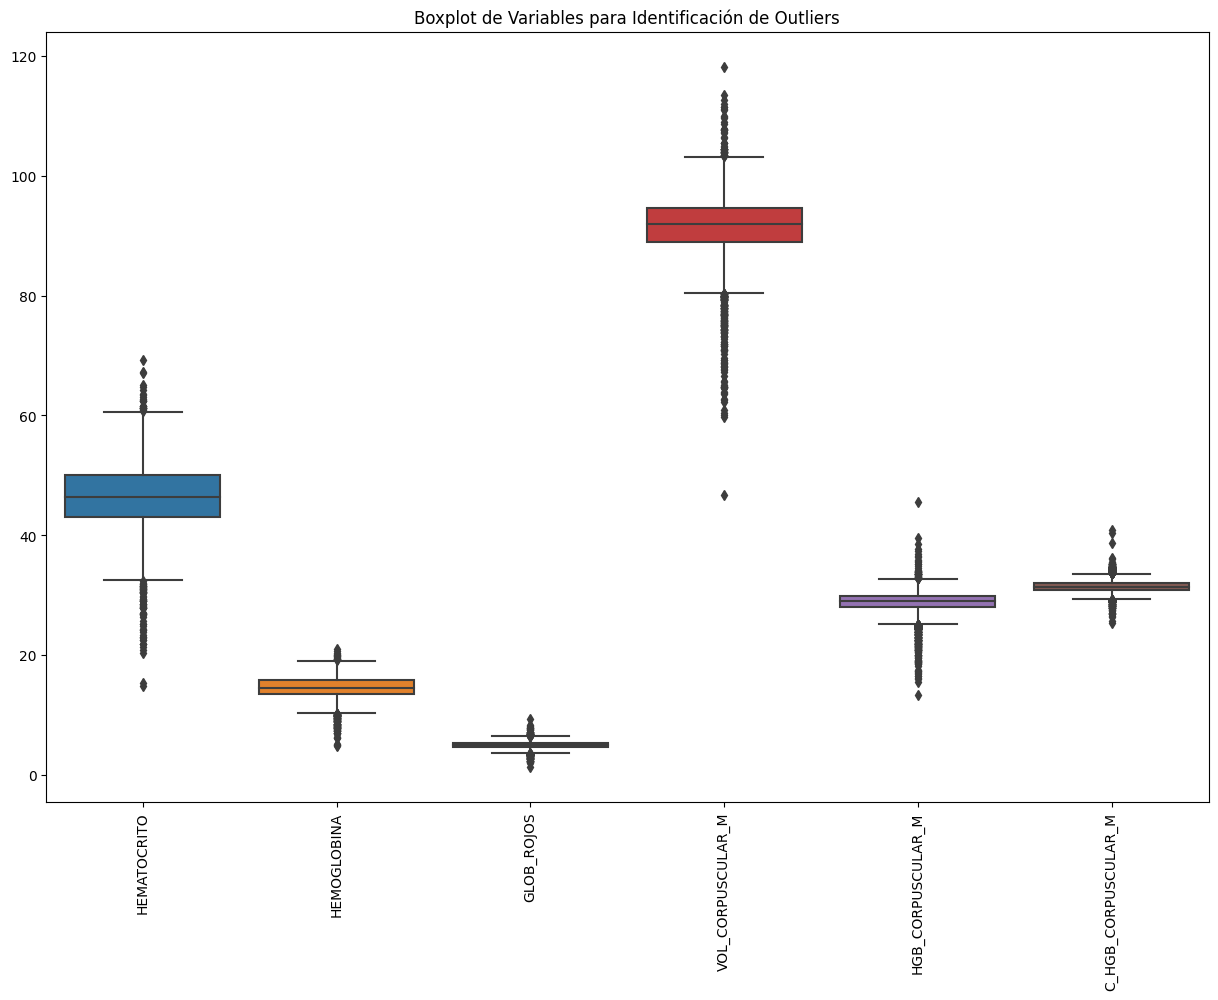

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Suponiendo que data2 es tu DataFrame original
# Generar un boxplot para cada variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=bm_df[['HEMATOCRITO', 'HEMOGLOBINA', 'GLOB_ROJOS', 'VOL_CORPUSCULAR_M', 'HGB_CORPUSCULAR_M', 'C_HGB_CORPUSCULAR_M']])
plt.title('Boxplot de Variables para Identificación de Outliers')
plt.xticks(rotation=90)  # Rotar las etiquetas de las variables para mejor legibilidad
plt.show()


In [ ]:
import pandas as pd

# Definir las columnas en las que queremos limpiar outliers
columns_to_clean = ['HEMATOCRITO', 'HEMOGLOBINA', 'GLOB_ROJOS','VOL_CORPUSCULAR_M', 'HGB_CORPUSCULAR_M', 'C_HGB_CORPUSCULAR_M']

# Calcular el rango intercuartílico (IQR) para las columnas seleccionadas
Q1 = bm_df[columns_to_clean].quantile(0.25)
Q3 = bm_df[columns_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Definir un rango para filtrar los outliers
rango_filtrado = (bm_df[columns_to_clean] < (Q1 - 1.5 * IQR)) | (bm_df[columns_to_clean] > (Q3 + 1.5 * IQR))

# Eliminar los outliers del DataFrame original basado en las columnas seleccionadas
bm_df_filtrado = bm_df[~rango_filtrado.any(axis=1)]

# Mostrar el DataFrame filtrado
print(bm_df_filtrado)


      HEMATOCRITO  HEMOGLOBINA  GLOB_ROJOS  VOL_CORPUSCULAR_M  \
0            48.2         14.9        5.17               93.1   
1            49.8         16.2        5.42               91.9   
2            46.3         14.7        4.63              100.0   
3            49.0         15.8        5.36               91.4   
4            43.9         14.0        4.79               91.7   
...           ...          ...         ...                ...   
6546         47.5         15.3        5.38               88.3   
6547         45.9         14.2        5.30               86.6   
6548         52.6         16.8        5.63               93.5   
6549         54.0         16.4        6.37               84.7   
6550         51.5         16.1        5.43               95.0   

      HGB_CORPUSCULAR_M  C_HGB_CORPUSCULAR_M  NIV_CONF_ANE  NIV_CONF_POL  
0                  28.9                 31.0           1.0           0.0  
1                  30.0                 32.6           1.0           

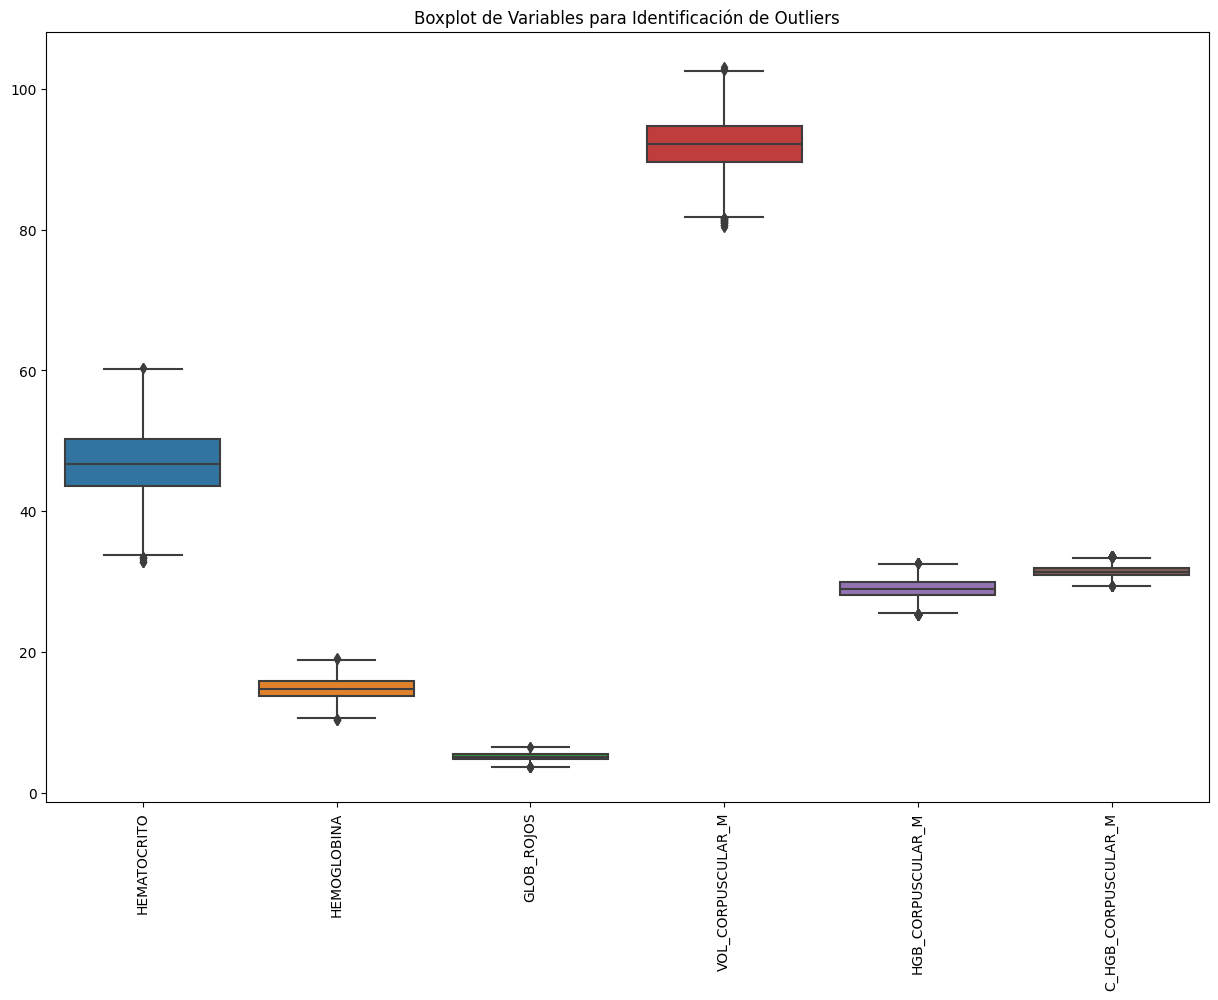

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Suponiendo que data2 es tu DataFrame original
# Generar un boxplot para cada variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=bm_df_filtrado[['HEMATOCRITO', 'HEMOGLOBINA', 'GLOB_ROJOS', 'VOL_CORPUSCULAR_M', 'HGB_CORPUSCULAR_M', 'C_HGB_CORPUSCULAR_M']])
plt.title('Boxplot de Variables para Identificación de Outliers')
plt.xticks(rotation=90)  # Rotar las etiquetas de las variables para mejor legibilidad
plt.show()

##Generación de archivos .csv de anemia y poliglobulia

In [ ]:
df_an = pd.DataFrame()

In [ ]:
df_an = bm_df_filtrado

In [ ]:
df_an = df_an.drop(columns=['NIV_CONF_ANE'])

In [ ]:
df_an.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M
0,48.2,14.9,5.17,93.1,28.9,31.0
1,49.8,16.2,5.42,91.9,30.0,32.6
2,46.3,14.7,4.63,100.0,31.8,31.7
3,49.0,15.8,5.36,91.4,29.4,32.2
4,43.9,14.0,4.79,91.7,29.2,31.8


In [ ]:
df.head()

,ORDEN,EDAD,SEXO,FECHA_INGRESO,HEMATOCRITO,HEMOGLOBINA,PLAQUETAS,GLOB_BLANCOS,NEUTROFILOS,LINFOCITOS,...,C_HGB_CORPUSCULAR_M,RDW_CV,MID_PRC,MID,MPV,PDW,PCT,RDW_SD,NIV_CONF_ANE,NIV_CONF_POL
0,93537,28.0,0,2022-02-25,48.2,14.9,254.0,7.04,5.18,1.49,...,31.0,12.6,5.3,0.37,10.1,16.2,0.256,49.2,1,0
1,93538,30.0,1,2022-02-25,49.8,16.2,259.0,6.62,3.15,2.96,...,32.6,12.7,7.8,0.51,8.1,15.5,0.209,48.9,1,0
2,93547,51.0,1,2022-02-25,46.3,14.7,299.0,5.29,3.38,1.51,...,31.7,12.6,7.6,0.40,8.9,15.9,0.267,53.4,2,1
3,93548,46.0,1,2022-02-25,49.0,15.8,291.0,7.09,3.96,2.57,...,32.2,12.2,7.9,0.56,8.9,16.5,0.261,47.1,1,0
4,93549,49.0,0,2022-02-25,43.9,14.0,320.0,6.24,3.82,1.92,...,31.8,12.3,8.1,0.50,9.6,16.1,0.307,47.6,1,0


In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado bm_df y la columna específica se llama "mi_columna"

# Función para aplicar la condición
def generar_target(valor):
    if valor >= 2:
        return 1  # Valor de target si la condición se cumple
    else:
        return 0  # Valor de target si la condición no se cumple

# Crear la nueva columna "target" basada en la condición
df_an['TARGET'] = bm_df_filtrado['NIV_CONF_ANE'].apply(lambda x: generar_target(x))

# Mostrar el DataFrame con la nueva columna "target"
print(df_an)


      HEMATOCRITO  HEMOGLOBINA  GLOB_ROJOS  VOL_CORPUSCULAR_M  \
0            48.2         14.9        5.17               93.1   
1            49.8         16.2        5.42               91.9   
2            46.3         14.7        4.63              100.0   
3            49.0         15.8        5.36               91.4   
4            43.9         14.0        4.79               91.7   
...           ...          ...         ...                ...   
6546         47.5         15.3        5.38               88.3   
6547         45.9         14.2        5.30               86.6   
6548         52.6         16.8        5.63               93.5   
6549         54.0         16.4        6.37               84.7   
6550         51.5         16.1        5.43               95.0   

      HGB_CORPUSCULAR_M  C_HGB_CORPUSCULAR_M  TARGET  
0                  28.9                 31.0       0  
1                  30.0                 32.6       0  
2                  31.8                 31.7       1  

In [ ]:
df_an.to_csv('data_ane.csv', index=False)

In [ ]:
df_pol = pd.DataFrame()

In [ ]:
df_pol = bm_df_filtrado

In [ ]:
df_pol = df_pol.drop(columns=['NIV_CONF_ANE'])

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado bm_df y la columna específica se llama "mi_columna"

# Función para aplicar la condición
def generar_target(valor):
    if valor >= 2:
        return 1  # Valor de target si la condición se cumple
    else:
        return 0  # Valor de target si la condición no se cumple

# Crear la nueva columna "target" basada en la condición
df_pol['TARGET'] = bm_df_filtrado['NIV_CONF_POL'].apply(lambda x: generar_target(x))

# Mostrar el DataFrame con la nueva columna "target"
print(df_pol)

      HEMATOCRITO  HEMOGLOBINA  GLOB_ROJOS  VOL_CORPUSCULAR_M  \
0            48.2         14.9        5.17               93.1   
1            49.8         16.2        5.42               91.9   
2            46.3         14.7        4.63              100.0   
3            49.0         15.8        5.36               91.4   
4            43.9         14.0        4.79               91.7   
...           ...          ...         ...                ...   
6546         47.5         15.3        5.38               88.3   
6547         45.9         14.2        5.30               86.6   
6548         52.6         16.8        5.63               93.5   
6549         54.0         16.4        6.37               84.7   
6550         51.5         16.1        5.43               95.0   

      HGB_CORPUSCULAR_M  C_HGB_CORPUSCULAR_M  TARGET  
0                  28.9                 31.0       0  
1                  30.0                 32.6       0  
2                  31.8                 31.7       0  

In [ ]:
df_sorted = df_pol.sort_values(by='TARGET', ascending=True)
df_sorted.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,TARGET
0,48.2,14.9,5.17,93.1,28.9,31.0,0
4329,44.6,13.9,4.84,92.2,28.8,31.2,0
4327,55.5,17.3,6.42,86.5,27.0,31.2,0
4326,49.8,15.0,5.40,92.2,27.8,30.2,0
4325,44.4,13.7,4.95,89.8,27.7,30.9,0


In [ ]:
# Contar cuántos valores en la columna 'Puntuación' son mayores a cero
count_greater_than_zero = (df_pol['TARGET'] > 0).sum()

# Mostrar el resultado
print(f"El número de valores mayores a cero en la columna 'Puntuación' es: {count_greater_than_zero}")

El número de valores mayores a cero en la columna 'Puntuación' es: 385


In [ ]:
df_pol.to_csv('data_pol.csv', index=False)

##Matriz de correlación

In [ ]:
df1 = df.drop(columns=['ORDEN', 'ANEMIA', 'POLIGLOBULIA', 'NIV_CONF_ANE', 'NIV_CONF_POL', 'FECHA_INGRESO'])

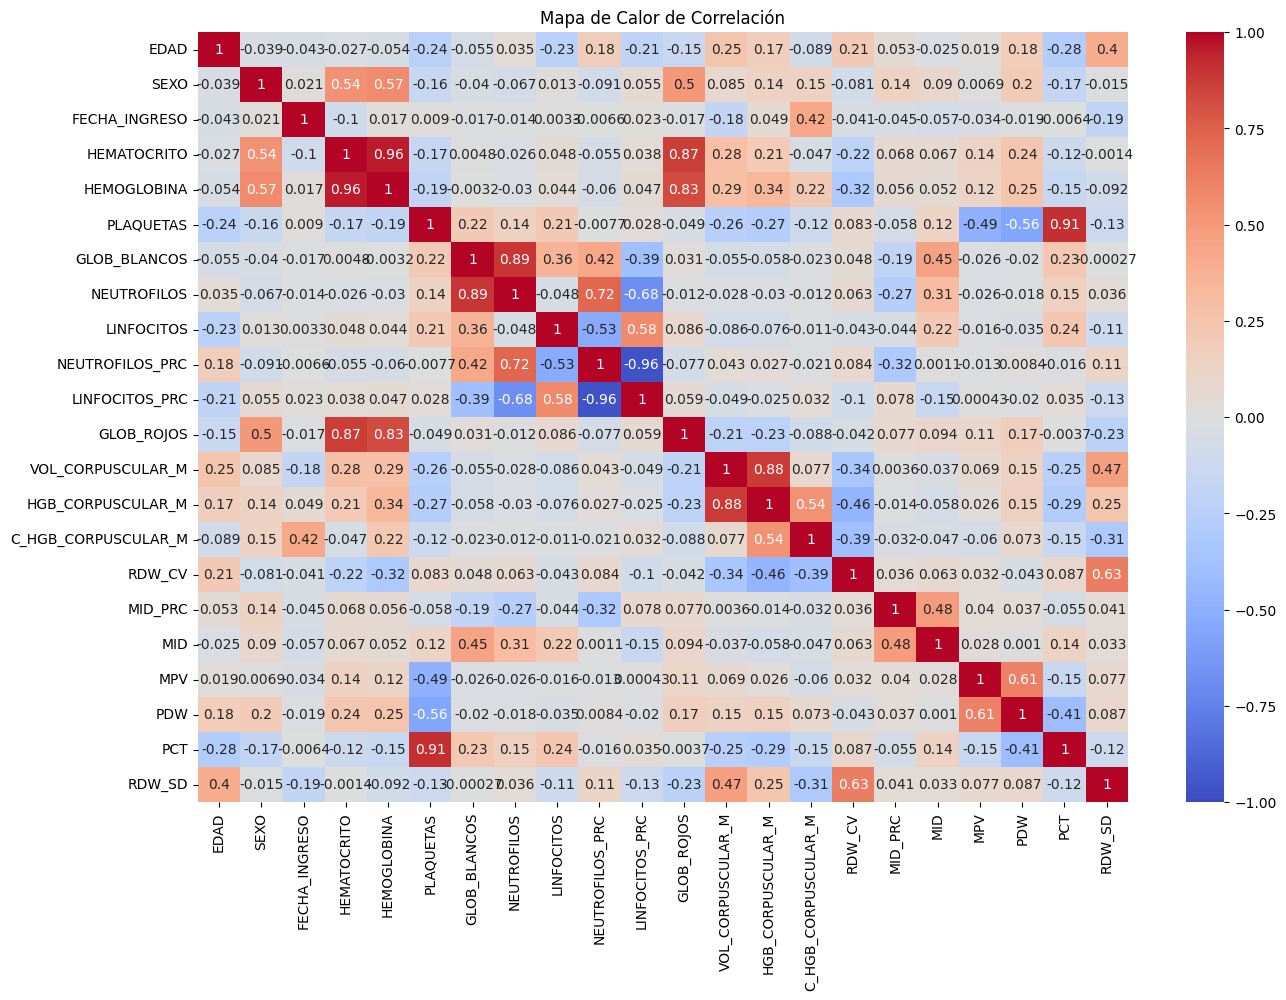

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = heatmap.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
print(df.shape)

(6550, 27)


In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['HEMATOCRITO'], df['HEMOGLOBINA'])
print(f"Índice de correlación de Pearson es {pearson_coef} y P value es {p_value}")


Índice de correlación de Pearson es 0.9591363833231805 y P value es 0.0


In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['HEMATOCRITO'], df['GLOB_ROJOS'])
print(f"Índice de correlación de Pearson es {pearson_coef} y P value es {p_value}")


Índice de correlación de Pearson es 0.8706706764739617 y P value es 0.0


In [ ]:
heatmap = df.drop(columns=['ORDEN', 'ANEMIA', 'POLIGLOBULIA', 'NIV_CONF_ANE', 'NIV_CONF_POL'])

In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['HEMOGLOBINA'], df['GLOB_ROJOS'])
print(f"Índice de correlación de Pearson es {pearson_coef} y P value es {p_value}")


Índice de correlación de Pearson es 0.82597924392874 y P value es 0.0


In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['VOL_CORPUSCULAR_M'], df['HGB_CORPUSCULAR_M'])
print(f"Índice de correlación de Pearson es {pearson_coef} y P value es {p_value}")


Índice de correlación de Pearson es 0.8757532099435109 y P value es 0.0
